# In this python notebook, we will be checking out various classification techniques. 

* ### Problem Statement:

The latest United States presidential election among candidates Donald Trump and Hillary Clinton was a contentious one. Regardless of your political beliefs both parties reported to use analytics to help guide their decision-making, such as where to campaign, etc. The company which is not disclosed was working with a political organization to help them predict the probability that a particular person would register as a Democrat. The data description below shows the 3 tables provided and what is measured. 

### Data Description:
*	individual_data: contain Individual-level data on each person’s age, race, gender, voting history, party registration, and education. Each person has a unique person_id and also a household ID (hh_id) that indicates the household they belong to.
*	household_data: contains household-level demographics where each household has an income, indicator for whether the house is in an urban or rural area, whether the home is owned by the household and whether the household is in a census tract that is in the top, bottom, or middle third of household income
*	registration_status: contains whether the person is registered as a Democrat (is_registered_democrat). Note: 1 = Yes, 0 = Unregistered or in another party, Missing = unknown



# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np

# Data Pre-processing

In [2]:
individual=pd.read_csv('individual_data.csv')
registration=pd.read_csv('registration_status.csv',sep='|')
household=pd.read_csv('household_data.csv')

In [3]:
# Visualising Data
individual.head()

,hh_id,person_id,is_head_of_household,married,gender,race,age,voted_in_2012,is_college_graduate
0,1,1,1,Single,Female,White,28,0,1
1,1,2,0,Single,Male,White,27,1,1
2,2,3,1,Married,Female,White,34,0,1
3,2,4,0,Married,Male,White,33,1,0
4,2,5,0,Single,Male,White,6,0,1


In [4]:
registration.head()

,person_id,is_registered_democrat
0,1,0.0
1,2,0.0
2,3,0.0
3,4,1.0
4,5,0.0


In [5]:
household.head()

,hh_id,hh_income,is_urban,is_owner_of_home,tercile_of_census_tract_income
0,1,111000,1,0,Middle
1,2,123000,1,1,Bottom
2,3,105400,1,0,Middle
3,4,48100,1,0,Top
4,5,54600,0,0,Top


In [6]:
# Get unique values
def unique_val(data):
    for i in data.columns:
        print('unique values for column ',i,':',len(data[i].unique()))
    

In [7]:
#Table individual
print('-------Individual-------')
unique_val(individual)
print('------Household------')
# Table Household
unique_val(household)
#Table registration
print('--------Registration-------')
unique_val(registration)


-------Individual-------
unique values for column  hh_id : 10000
unique values for column  person_id : 21046
unique values for column  is_head_of_household : 2
unique values for column  married : 2
unique values for column  gender : 6
unique values for column  race : 3
unique values for column  age : 16
unique values for column  voted_in_2012 : 2
unique values for column  is_college_graduate : 2
------Household------
unique values for column  hh_id : 10000
unique values for column  hh_income : 581
unique values for column  is_urban : 2
unique values for column  is_owner_of_home : 2
unique values for column  tercile_of_census_tract_income : 3
--------Registration-------
unique values for column  person_id : 10537
unique values for column  is_registered_democrat : 3


In [8]:
#Function to Get Null values of each column of a table 
def Null_perc(data):
    for i in data.columns:
        print('---------',i,'-------------')
        print('Percentage of null values for column:',i,': ',(sum(pd.Series(data[i].isnull()))/len(data[i]))* 100 )
        print('Number of null values for column:',i,':',sum(pd.Series(data[i].isnull())))

In [9]:
# Checking Null Values:
print('###### Household ######')
Null_perc(household)
print('\n\n ###### Individual ######')
Null_perc(individual)
print('\n\n ###### Registration ######')
Null_perc(registration)

###### Household ######
--------- hh_id -------------
Percentage of null values for column: hh_id :  0.0
Number of null values for column: hh_id : 0
--------- hh_income -------------
Percentage of null values for column: hh_income :  0.0
Number of null values for column: hh_income : 0
--------- is_urban -------------
Percentage of null values for column: is_urban :  0.0
Number of null values for column: is_urban : 0
--------- is_owner_of_home -------------
Percentage of null values for column: is_owner_of_home :  0.0
Number of null values for column: is_owner_of_home : 0
--------- tercile_of_census_tract_income -------------
Percentage of null values for column: tercile_of_census_tract_income :  0.0
Number of null values for column: tercile_of_census_tract_income : 0


 ###### Individual ######
--------- hh_id -------------
Percentage of null values for column: hh_id :  0.0
Number of null values for column: hh_id : 0
--------- person_id -------------
Percentage of null values for colum

In [10]:
# Removing columns with null data
Null_registration=registration[registration.is_registered_democrat.isnull()]
registration=registration[registration.is_registered_democrat.isnull()==False]

In [11]:
#Checking data again
Null_perc(registration)

--------- person_id -------------
Percentage of null values for column: person_id :  0.0
Number of null values for column: person_id : 0
--------- is_registered_democrat -------------
Percentage of null values for column: is_registered_democrat :  0.0
Number of null values for column: is_registered_democrat : 0


In [12]:
# We can now join the datasets 
demographics=individual.merge(household,left_on='hh_id',right_on='hh_id',how='left')

In [13]:
# After merging, we only have around 9500 rows
demographics=demographics.merge(registration,left_on='person_id',right_on='person_id',how='inner')

In [14]:
#Checking fro Nulls
Null_perc(demographics)

--------- hh_id -------------
Percentage of null values for column: hh_id :  0.0
Number of null values for column: hh_id : 0
--------- person_id -------------
Percentage of null values for column: person_id :  0.0
Number of null values for column: person_id : 0
--------- is_head_of_household -------------
Percentage of null values for column: is_head_of_household :  0.0
Number of null values for column: is_head_of_household : 0
--------- married -------------
Percentage of null values for column: married :  0.0
Number of null values for column: married : 0
--------- gender -------------
Percentage of null values for column: gender :  0.0
Number of null values for column: gender : 0
--------- race -------------
Percentage of null values for column: race :  0.0
Number of null values for column: race : 0
--------- age -------------
Percentage of null values for column: age :  0.0
Number of null values for column: age : 0
--------- voted_in_2012 -------------
Percentage of null values for 

In [15]:
unique_val(demographics)

unique values for column  hh_id : 4531
unique values for column  person_id : 9537
unique values for column  is_head_of_household : 2
unique values for column  married : 2
unique values for column  gender : 6
unique values for column  race : 3
unique values for column  age : 16
unique values for column  voted_in_2012 : 2
unique values for column  is_college_graduate : 2
unique values for column  hh_income : 525
unique values for column  is_urban : 2
unique values for column  is_owner_of_home : 2
unique values for column  tercile_of_census_tract_income : 3
unique values for column  is_registered_democrat : 2


In [16]:
# We see that there are 6 unique values of gender. Hmm Something fishy!
print(demographics.gender.unique())
# Hmm gotcha! lets make these consistent
demographics.gender=demographics.gender.replace('F','Female')
demographics.gender=demographics.gender.replace('M','Male')
demographics.gender=demographics.gender.replace('MALE','Male')
demographics.gender=demographics.gender.replace('FEMALE','Female')
print(demographics.gender.unique())

['Female' 'Male' 'FEMALE' 'F' 'MALE' 'M']
['Female' 'Male']


In [17]:
# Generating a new feature: in_av_income: individual average income-> average income per person in the household
hh_member_count=demographics.groupby('hh_id')['hh_income'].count().reset_index()
hh_member_count.columns=['hh_id','hh_members']
demographics=demographics.merge(hh_member_count,left_on='hh_id',right_on='hh_id',how='left')
demographics['av_income']=demographics.hh_income/demographics.hh_members
demographics=demographics.drop('hh_members',axis=1)

# Making dummy variables

In [18]:
#Dummies for gender
gender=pd.get_dummies(demographics.gender)
# Keeping only one column
gender=pd.DataFrame(gender[gender.columns[0]])
demographics = pd.concat([demographics, gender], axis=1)
demographics=demographics.drop('gender',axis=1)

In [19]:
#Dummies for married
married=pd.get_dummies(demographics.married)
#Keeping only one column
married=pd.DataFrame(married[married.columns[0]])
demographics = pd.concat([demographics, married], axis=1)
demographics=demographics.drop('married',axis=1)

In [20]:
# Dummies for Race
race=pd.get_dummies(demographics.race)
race=race[[race.columns[0],race.columns[1]]]
demographics = pd.concat([demographics, race], axis=1)
demographics=demographics.drop('race',axis=1)

In [21]:
# Dummies for census_tract_income
income=pd.get_dummies(demographics.tercile_of_census_tract_income)
income=income[[income.columns[0],income.columns[1]]]
demographics = pd.concat([demographics, income], axis=1)
demographics=demographics.drop('tercile_of_census_tract_income',axis=1)

# Statistical Modeling

In [22]:
#Importing required libraries
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.cross_validation import train_test_split
import time
from sklearn.metrics import roc_curve, auc

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
X=demographics.drop('is_registered_democrat',axis=1)
y=demographics.is_registered_democrat

In [24]:
y

0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
5       1.0
6       0.0
7       1.0
8       0.0
9       1.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      1.0
23      0.0
24      0.0
25      1.0
26      0.0
27      0.0
28      1.0
29      0.0
       ... 
9507    1.0
9508    0.0
9509    1.0
9510    1.0
9511    0.0
9512    1.0
9513    1.0
9514    0.0
9515    0.0
9516    1.0
9517    0.0
9518    0.0
9519    0.0
9520    0.0
9521    1.0
9522    1.0
9523    1.0
9524    0.0
9525    1.0
9526    1.0
9527    0.0
9528    1.0
9529    1.0
9530    0.0
9531    0.0
9532    0.0
9533    0.0
9534    0.0
9535    1.0
9536    0.0
Name: is_registered_democrat, Length: 9537, dtype: float64

In [25]:
# Divide data to train and test 
#A stratified split means the proportion of split is according to the proportion of classes in the actual response
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=27,stratify=y)

# Logistic Regression

In [26]:
import matplotlib.pyplot as plt
import time
log = LogisticRegression()

params = {'C':[0.01,0.1,1,10]}

loggrid = GridSearchCV(estimator=log,param_grid=params,cv=5,scoring='accuracy')

start = time.time()
loggrid.fit(X_train,y_train)
end = time.time()
print(end-start)

0.6703548431396484


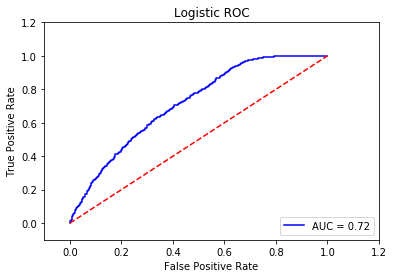

Auc: 0.7150569277031021


In [255]:
#Our metric of accuracy is AUC of the ROC Curve
y_pred = loggrid.best_estimator_.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Logistic ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('Auc:',roc_auc)

# Random Forest Classifier

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
# Number of trees in the Forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [28]:
rf=RandomForestClassifier()
rf_hyperparam_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [29]:
rfgrid = RandomizedSearchCV(estimator=rf,
                            param_distributions=rf_hyperparam_grid,
                            cv=5,scoring='accuracy',
                            n_iter=3, 
                            random_state=27,
                            n_jobs = -1,
                           verbose=2)


In [30]:
# Fit the random forest model
start=time.time()
rfgrid.fit(X_train, y_train)
end=time.time()

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=  24.6s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=  24.8s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstr

[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.3min finished


In [31]:
print('Number of seconds:',end-start)

Number of seconds: 96.3785331249237


In [32]:
y_pred = rfgrid.best_estimator_.predict_proba(X_test)

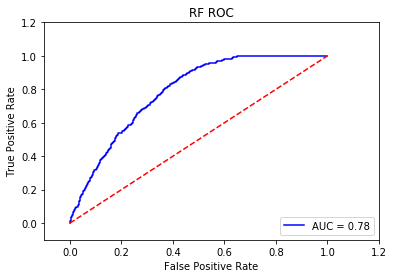

Auc: 0.7841334909661004


In [33]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('RF ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('Auc:',roc_auc)

# Bagging Classifier

In [39]:
from sklearn.ensemble import BaggingClassifier

In [42]:
# Setting Base estimator as our besr RF estimator model
bag=BaggingClassifier()
params = {'n_estimators':[20,30,40,400,600,800,1000]}
baggrid = RandomizedSearchCV(estimator=bag,param_distributions=params,cv=5,scoring='accuracy',n_iter=1,verbose=2,n_jobs=-1)


In [43]:
baggrid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] n_estimators=400 ................................................
[CV] n_estimators=400 ................................................
[CV] n_estimators=400 ................................................
[CV] n_estimators=400 ................................................
[CV] ................................. n_estimators=400, total=  10.3s
[CV] ................................. n_estimators=400, total=  10.4s
[CV] n_estimators=400 ................................................
[CV] ................................. n_estimators=400, total=  10.3s
[CV] ................................. n_estimators=400, total=  10.4s
[CV] ................................. n_estimators=400, total=   6.4s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.8s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=1, n_jobs=-1,
          param_distributions={'n_estimators': [20, 30, 40, 400, 600, 800, 1000]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=2)

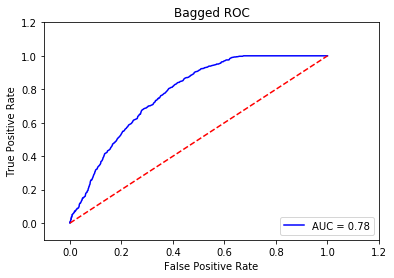

Auc: 0.7753810172453675


In [44]:
y_pred = baggrid.best_estimator_.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Bagged ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('Auc:',roc_auc)

# Adaboost Classifier

In [48]:
start=time.time()
abc = AdaBoostClassifier(base_estimator=rfgrid.best_estimator_,n_estimators=4)
abc.fit(X_train,y_train)
end=time.time()
start-end

-50.00375509262085

In [50]:
params = {'n_estimators':[2,3,4]}
abcgrid = RandomizedSearchCV(estimator = abc, param_distributions= params, cv=5, scoring='accuracy',n_iter=3,verbose=2,n_jobs=-1)
abcgrid.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_estimators=2 ..................................................
[CV] n_estimators=2 ..................................................
[CV] n_estimators=2 ..................................................
[CV] n_estimators=2 ..................................................
[CV] ................................... n_estimators=2, total= 1.2min
[CV] ................................... n_estimators=2, total= 1.2min
[CV] n_estimators=2 ..................................................
[CV] n_estimators=3 ..................................................
[CV] ................................... n_estimators=2, total= 1.2min
[CV] n_estimators=3 ..................................................
[CV] ................................... n_estimators=2, total= 1.2min
[CV] n_estimators=3 ..................................................
[CV] ................................... n_estimators=3, total= 1.3min
[CV] n_estimators

[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  5.2min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=90, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_...se=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=4, random_state=None),
          fit_params=None, iid=True, n_iter=3, n_jobs=-1,
          param_distributions={'n_estimators': [2, 3, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=2)

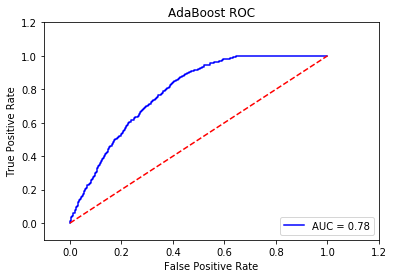

Auc: 0.7817799223829963


In [52]:
y_pred = abcgrid.best_estimator_.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('AdaBoost ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('Auc:',roc_auc)

In [54]:
# Get importance values
for i in range(0,len(X_train.columns)):
    print(X_train.columns[i],':',rfgrid.best_estimator_.feature_importances_[i])

hh_id : 0.108853790317194
person_id : 0.11119102551937693
is_head_of_household : 0.03250034581621743
age : 0.20458026262651008
voted_in_2012 : 0.029811496199979644
is_college_graduate : 0.047625792472157154
hh_income : 0.11955509393408743
is_urban : 0.01725003168020881
is_owner_of_home : 0.010169016245433012
av_income : 0.20189751600627254
Female : 0.017291892733988855
Married : 0.013206656115675692
Asian : 0.011338861269893055
Black : 0.013711071981039399
Bottom : 0.045815117089989275
Middle : 0.015202029991977445
